In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

housing=pd.read_csv("housing.csv")
housing.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [45]:
housing=housing[["price","area","bedrooms","stories","mainroad"]]
housing

,price,area,bedrooms,stories,mainroad
0,13300000,7420,4,3,yes
1,12250000,8960,4,4,yes
2,12250000,9960,3,2,yes
3,12215000,7500,4,2,yes
4,11410000,7420,4,2,yes
...,...,...,...,...,...
540,1820000,3000,2,1,yes
541,1767150,2400,3,1,no
542,1750000,3620,2,1,yes
543,1750000,2910,3,1,no


In [46]:
# want to apply correlation 

numerical_housing=housing.select_dtypes(include=[np.number])
numerical_housing.corr()["stories"] #apply correlation

price       0.420712
area        0.083996
bedrooms    0.408564
stories     1.000000
Name: stories, dtype: float64

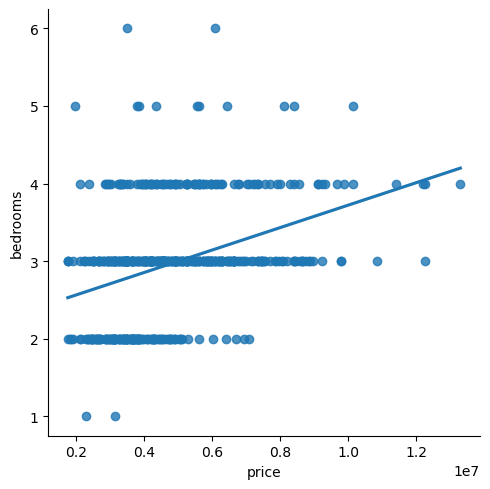

In [47]:
import seaborn as sns

sns.lmplot(x="price",y="bedrooms",data=housing,fit_reg=True,ci=None) #fit_reg fit the area 

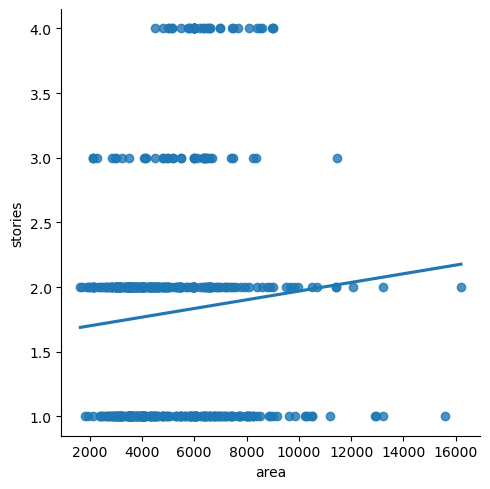

In [48]:
sns.lmplot(x="area",y="stories",data=housing,fit_reg=True,ci=None)

In [49]:
housing[housing.isnull().any(axis=1)]

,price,area,bedrooms,stories,mainroad


In [50]:
#cleaning data

housing.dropna()
housing

,price,area,bedrooms,stories,mainroad
0,13300000,7420,4,3,yes
1,12250000,8960,4,4,yes
2,12250000,9960,3,2,yes
3,12215000,7500,4,2,yes
4,11410000,7420,4,2,yes
...,...,...,...,...,...
540,1820000,3000,2,1,yes
541,1767150,2400,3,1,no
542,1750000,3620,2,1,yes
543,1750000,2910,3,1,no


In [51]:
#data splitting test and train data


train=housing[housing["area"]<5000].copy()
test=housing[housing["area"]>=5000].copy()

test.shape

(239, 5)

In [52]:
train.shape

(306, 5)

In [53]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()# model training

predictor=["price","bedrooms"]
target="area"# created predictor

reg.fit(train[predictor],train["area"])

prediction=reg.predict(test[predictor])

#test the result
test["prediction"]=prediction#evaluation
test

,price,area,bedrooms,stories,mainroad,prediction
0,13300000,7420,4,3,yes,5654.662552
1,12250000,8960,4,4,yes,5420.078707
2,12250000,9960,3,2,yes,5497.470136
3,12215000,7500,4,2,yes,5412.259245
4,11410000,7420,4,2,yes,5232.411631
...,...,...,...,...,...,...
487,2870000,5400,4,2,yes,3324.463026
488,2852500,5200,4,3,yes,3320.553295
494,2730000,6800,2,1,yes,3447.968039
520,2450000,7700,2,1,yes,3385.412347


In [54]:
#error analysis where the prediction is wrong 
from sklearn.metrics import mean_absolute_error

error=mean_absolute_error(test["area"],test["prediction"])
error


3015.1371482659706

In [55]:
#we want to describe the error in detail

housing.describe()["area"]

count      545.000000
mean      5150.541284
std       2170.141023
min       1650.000000
25%       3600.000000
50%       4600.000000
75%       6360.000000
max      16200.000000
Name: area, dtype: float64